In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
d = pd.read_excel(r"C:\Users\Admin\Downloads\Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)
d.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [5]:
d.shape

(5000, 14)

In [6]:
d.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
d = d.drop(['ID','ZIP Code'], axis=1)
d.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [10]:
from sklearn import tree
from sklearn import preprocessing

In [12]:
x = d.drop(['Personal Loan'], axis=1)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [14]:
x.shape

(5000, 11)

In [15]:
y = d.iloc[:, 7:8]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [16]:
model = tree.DecisionTreeClassifier(max_depth=22)
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
model.score(x,y)

1.0

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators = 1000, max_features = 2, oob_score = True)

In [21]:
rf.fit(x,y)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rf.oob_score_

0.9882

In [24]:
a2 = ['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 
     'Online', 'CreditCard']

for feature, imp in zip(a2, rf.feature_importances_):
    print(feature,"\t\t : ",imp);

Age 		 :  0.044950290614919876
Experience 		 :  0.04431046525384656
Income 		 :  0.3491258636662514
Family 		 :  0.09651379889429938
CCAvg 		 :  0.18118891916241445
Education 		 :  0.16188729428544757
Mortgage 		 :  0.04376339570697388
Securities Account 		 :  0.0053986458003063295
CD Account 		 :  0.05484705653119353
Online 		 :  0.008091207868119035
CreditCard 		 :  0.00992306221622806


In [25]:
imp = d[['Income','CCAvg','Education','Family']]
imp.head()

,Income,CCAvg,Education,Family
0,49,1.6,1,4
1,34,1.5,1,3
2,11,1.0,1,1
3,100,2.7,2,1
4,45,1.0,2,4


In [26]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [28]:
model = tree.DecisionTreeClassifier(max_depth=7)
model.fit(imp,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [30]:
with open('dt1.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Income','CCAvg','Education','Family'], out_file=f);

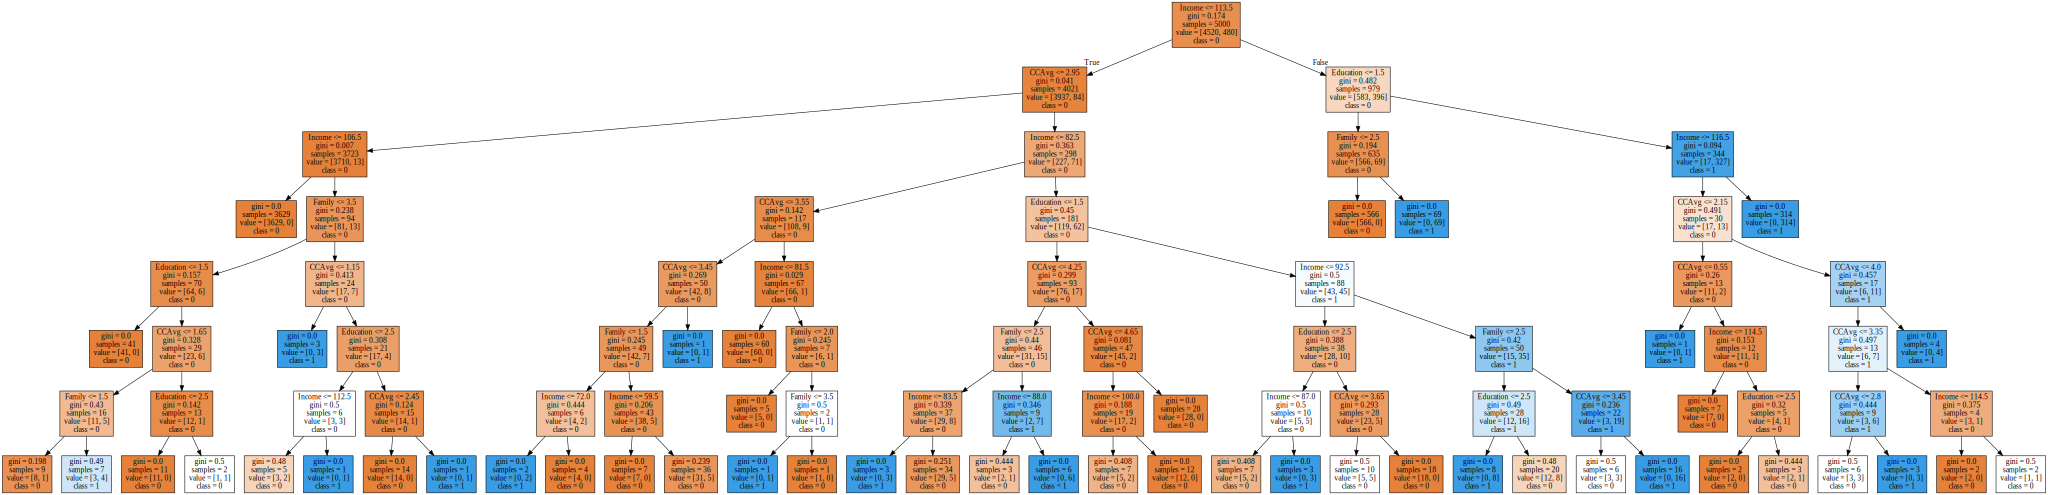

In [31]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Income','CCAvg','Education','Family'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

In [36]:
model.score(imp,y)

0.9914

In [37]:
rf.oob_score_

0.9882